In [1]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk

/Users/zameershaik/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv')

In [3]:
df

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [5]:
# Removal of stop words
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zameershaik/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
stop = stopwords.words('english')
df['tweet_without_stopwords'] = df['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


In [15]:
# finding hashtag words using regex
hash_list=[]
for i in df['tweet_without_stopwords']:
    hashh=re.findall(r"#(\w+)", i)
    hash_list.append(hashh)


In [16]:
hash_list

[['run'],
 ['lyft', 'disapointed', 'getthanked'],
 [],
 ['model'],
 ['motivation'],
 ['allshowandnogo'],
 [],
 ['school',
  'exams',
  'hate',
  'imagine',
  'actorslife',
  'revolutionschool',
  'girl'],
 ['allin', 'cavs', 'champions', 'cleveland', 'clevelandcavaliers'],
 ['gr8'],
 ['ireland', 'blog', 'silver', 'gold', 'forex'],
 ['orlando',
  'standwithorlando',
  'pulseshooting',
  'orlandoshooting',
  'biggerproblems',
  'selfish',
  'heabreaking',
  'values',
  'love'],
 ['80days', 'gettingfed'],
 ['cnn', 'michigan', 'tcot'],
 ['australia',
  'opkillingbay',
  'seashepherd',
  'helpcovedolphins',
  'thecove',
  'helpcovedolphins'],
 ['got7', 'junior', 'yugyoem', 'omg'],
 ['thankful', 'positive'],
 [],
 ['friday', 'cookies'],
 [],
 ['euro2016'],
 ['badday', 'coneofshame', 'cats', 'pissed', 'funny', 'laughs'],
 ['wine', 'weekend'],
 [],
 ['tgif', 'ff', 'gamedev', 'indiedev', 'indiegamedev', 'squad'],
 ['upsideofflorida', 'shopalyssas', 'love'],
 ['smiles', 'media', 'pressconference'

In [17]:
df['hashtagwords'] = hash_list

In [18]:
df

,id,label,tweet,tweet_without_stopwords,hashtagwords
0,1,0,@user when a father is dysfunctional and is s...,@user father dysfunctional selfish drags kids ...,[run]
1,2,0,@user @user thanks for #lyft credit i can't us...,@user @user thanks #lyft credit can't use caus...,"[lyft, disapointed, getthanked]"
2,3,0,bihday your majesty,bihday majesty,[]
3,4,0,#model i love u take with u all the time in ...,#model love u take u time urð±!!! ððð...,[model]
4,5,0,factsguide: society now #motivation,factsguide: society #motivation,[motivation]
...,...,...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...,ate @user isz youuu?ððððððð...,[]
31958,31959,0,to see nina turner on the airwaves trying to...,see nina turner airwaves trying wrap mantle ge...,"[shame, imwithher]"
31959,31960,0,listening to sad songs on a monday morning otw...,listening sad songs monday morning otw work sad,[]
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...","@user #sikh #temple vandalised #calgary, #wso ...","[sikh, temple, calgary, wso]"


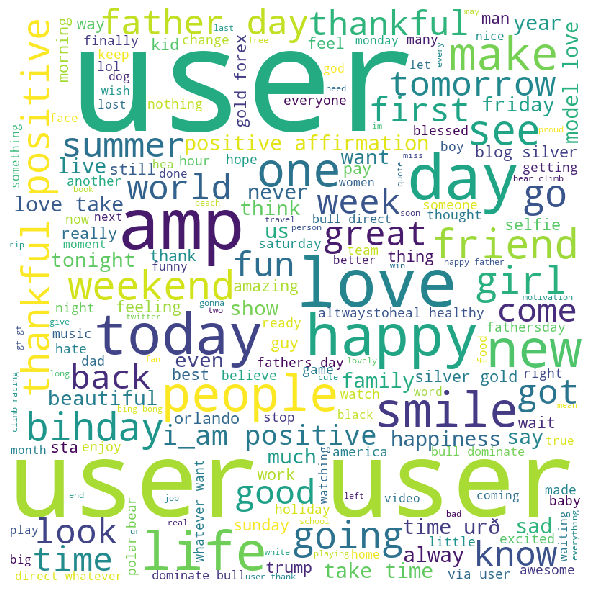

In [23]:
# wordcloud
from wordcloud import WordCloud, STOPWORDS 

comment_words = '' 
stopwords = set(STOPWORDS) 
  
for i in df['tweet_without_stopwords']: 
      
   
    val = str(i) 
  
     
    tokens = val.split() 
      
    
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
                   
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()
wordcloud.to_file('tweets.png')

In [31]:
#Key words extraction using nltk rake
from rake_nltk import Rake
r = Rake()
key=[]
for i in df['tweet_without_stopwords']:
    #Example
    a=r.extract_keywords_from_text(i)
    b=r.get_ranked_phrases()
    c=r.get_ranked_phrases_with_scores()
    key.append(c)
# we calculate the means scores for each article and take the words who have their scores > mean*2

score=[]
avg=[]
for i in key:
    score=[]
    for j in i:
        #print(j[0])
        score.append(j[0])
    avg.append(np.mean(score)*1.75)
main=[]
for i,j in zip(key,avg):
    filt=[]
    
   
    
    
    for q in range(0,len(i)):
        if(i[q][0]>j):
                
            filt.append((i[q][1]))
    main.append(str(filt))
df['Key_Info'] = main

/Users/zameershaik/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/zameershaik/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [32]:
pd.set_option('display.max_colwidth',-1)
df

/Users/zameershaik/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


,id,label,tweet,tweet_without_stopwords,hashtagwords,Key_Info
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,@user father dysfunctional selfish drags kids dysfunction. #run,[run],['user father dysfunctional selfish drags kids dysfunction']
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,@user @user thanks #lyft credit can't use cause offer wheelchair vans pdx. #disapointed #getthanked,"[lyft, disapointed, getthanked]",['use cause offer wheelchair vans pdx']
2,3,0,bihday your majesty,bihday majesty,[],[]
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love u take u time urð±!!! ðððð ð¦ð¦ð¦,[model],[]
4,5,0,factsguide: society now #motivation,factsguide: society #motivation,[motivation],[]
...,...,...,...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððððððâ¤ï¸,ate @user isz youuu?ðððððððððâ¤ï¸,[],['ð \x9f\x98\x8d ð \x9f\x98\x8d ð \x9f\x98\x8d ð \x9f\x98\x8d ð \x9f\x98\x8d ð \x9f\x98\x8d ð \x9f\x98\x8d ð \x9f\x98\x8d ð \x9f\x98\x8d â \x9d¤ ï ¸\x8f']
31958,31959,0,to see nina turner on the airwaves trying to wrap herself in the mantle of a genuine hero like shirley chisolm. #shame #imwithher,see nina turner airwaves trying wrap mantle genuine hero like shirley chisolm. #shame #imwithher,"[shame, imwithher]",['see nina turner airwaves trying wrap mantle genuine hero like shirley chisolm']
31959,31960,0,listening to sad songs on a monday morning otw to work is sad,listening sad songs monday morning otw work sad,[],[]
31960,31961,1,"@user #sikh #temple vandalised in in #calgary, #wso condemns act","@user #sikh #temple vandalised #calgary, #wso condemns act","[sikh, temple, calgary, wso]",['wso condemns act']
